# Decision Trees and Random Forests

Previously we have looked in depth at a simple generative classifier (naive Bayes; see In Depth: Naive Bayes Classification) and a powerful discriminative classifier (support vector machines; see In-Depth: Support Vector Machines). Here we'll take a look at motivating another powerful algorithm—a non-parametric algorithm called random forests. Random forests are an example of an ensemble method, meaning that it relies on aggregating the results of an ensemble of simpler estimators. The somewhat surprising result with such ensemble methods is that the sum can be greater than the parts: that is, a majority vote among a number of estimators can end up being better than any of the individual estimators doing the voting! We will see examples of this in the following sections. We begin with the standard imports:

In [2]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Motivating Random Forests: Decision Trees

Rando mforests are an exmpale of an *ensemble learner* built on decisoin trees. For this reason we'll start by discussing decision trees themselves.

Decision trees are extremely intuitive ways to classify or labels objects: you simple ask a series of questions designed to zero-in on the classification. For example, if you wanted to build a decision tree to classify an animal you come across while on a hike, you might construct the one shown here:

![decision_tree](https://jakevdp.github.io/PythonDataScienceHandbook/figures/05.08-decision-tree.png)

The binary splitting makes this extremely efficient: in a well-constructed tree, each question will cut hte number of options by approximately half, very quickly narrowing hte options even among a large number of classes. The trick, of course, comes in deciding which question to ask at each step. In machine learning implementations of decision trees, the questions generally take the form of axis-aligned splits in the data: that is, each node in the tree splits the dat ainto two groups usinga cutoff value within one of the features. Let's now look at an example of this.

### Creatin ga decision tree

Consider the following two-dimensional data, which has one of four class labels:

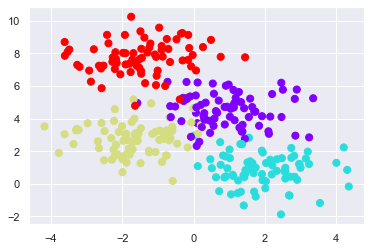

In [4]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

A simple decision tree built on this data will iteratively split the data along one or the other axis according to some quantitative criterion, and at each level assign the label of the new region according to a majority vote of points within it. This figure presents a visualization of the first four levels of a decision tree classifier for this data:

![spliting_decision](https://jakevdp.github.io/PythonDataScienceHandbook/figures/05.08-decision-tree-levels.png)

Notice that after the first split, every point in the upper branch remains unchanged, so there is no need to further subdivide this branch. Except for nodes that contain all of one color, at each level *every* region is again split along one of the two features.

This process of fitting a decision tree to our data can be done in Sciit-Learn with the `DecisionTreeClassifier` estimator:

In [5]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

Let's write a quick utility function to help us visualize the output of the classifier:

In [11]:
def visualize_classifier(model, X, y , ax=None, cmap='rainbow'):
    ax = ax or plt.gca()

    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
             clim=(y.min(), y.max()), zorder=3)
    
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)                         

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

Now we can examine what the decision tree classification looks like:

<ipython-input-11-83e205458e87>:21: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


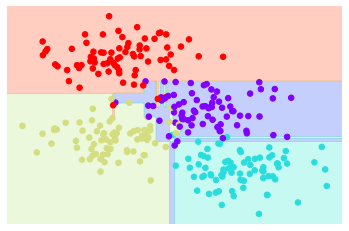

In [13]:
visualize_classifier(DecisionTreeClassifier(), X, y);

If you're runnig this notebook live, you can use the helpers script included to bring up an interactive visualization of the decison tree building process:

In [14]:
# helpers_05_8 is found in the online appendix
import helpers_05_08
helpers_05_08.plot_tree_interactive(X, y)

ModuleNotFoundError: No module named 'helpers_05_08'

Notice that as the depth increases, we tend to get very strangely shaped classification regions; for example, at a depth of five, there is a tall and skinny purple region between the yellow and blue regions. It's clear that this is less a result of the true, intrinsic data distribution, and more a result of the particular sampling or noise properties of the data. That is, this decision tree, even at only five levels deep, is clearly over-fitting our data.